In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

## Reading In The Dataset

In [17]:
df=pd.read_csv('/Users/mac/Downloads/laptop_details.csv')

In [18]:
df.head(20)

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
5,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,4.3,"₹38,990",Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...
7,RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB ...,4.1,"₹39,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,"₹46,990",Stylish & Portable Thin and Light Laptop14 inc...
9,ASUS VivoBook 14 (2022) Ryzen 7 Quad Core AMD ...,4.1,"₹44,990",AMD Ryzen 7 Quad Core Processor16 GB DDR4 RAM6...


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


##  Data Cleaning

In [20]:
df.duplicated().sum()

297

In [21]:
duplicates = df.duplicated()
print(df[duplicates])

                                               Product  Rating        MRP  \
25   RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB ...     4.1    ₹39,990   
26   Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...     4.2    ₹39,990   
27   ASUS ROG Strix G15 (2022) with 90Whr Battery R...     NaN  ₹1,96,990   
29   realme Book (Slim) Core i3 11th Gen - (8 GB/25...     4.4    ₹46,990   
30   Lenovo IdeaPad 1 Ryzen 5 Quad Core 3500U - (8 ...     4.2    ₹38,705   
..                                                 ...     ...        ...   
708  ASUS VivoBook 15 Core i5 10th Gen - (8 GB/1 TB...     3.9    ₹44,990   
710  Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...     4.2    ₹35,590   
711  ASUS ROG Strix G15 Advantage Edition with 90Wh...     4.9  ₹1,50,990   
716  Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...     4.5    ₹73,490   
717  ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...     NaN  ₹1,94,990   

                                               Feature  
25   Intel Core i5

In [52]:
df = df.drop_duplicates().reset_index(drop=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  423 non-null    object 
 1   Rating   339 non-null    float64
 2   MRP      423 non-null    object 
 3   Feature  423 non-null    object 
dtypes: float64(1), object(3)
memory usage: 16.5+ KB


In [24]:
df.isnull().sum()

Product     0
Rating     84
MRP         0
Feature     0
dtype: int64

In [25]:
df['Rating'].describe()

count    339.000000
mean       4.316224
std        0.299905
min        3.000000
25%        4.200000
50%        4.300000
75%        4.500000
max        5.000000
Name: Rating, dtype: float64

In [28]:
df_median=df['Rating'].median()

In [29]:
df=df.fillna(df_median)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  423 non-null    object 
 1   Rating   423 non-null    float64
 2   MRP      423 non-null    object 
 3   Feature  423 non-null    object 
dtypes: float64(1), object(3)
memory usage: 16.5+ KB


In [31]:
df['Product'].unique()

array(['Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop',
       'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...',
       'ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...',
       'HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...',
       'ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...',
       'HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop',
       'DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) D560841WIN9S Thin and Ligh...',
       'RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) Thin and Light Laptop',
       'realme Book (Slim) Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thin and 

In [32]:
df['Feature'].unique()[20]

'Apple M1 Processor8 GB DDR4 RAMMac OS Operating System256 GB SSD33.78 cm (13.3 inch) DisplayBuilt-in Apps: iMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player1 Year Limited Warra\xadnty'

### Extracting The Features

In [33]:
print(df['Feature'][3])
print(df['Feature'][300])
print(df['Feature'][232])

AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty
AMD Ryzen 3 Quad Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD35.56 cm (14 Inch) Display1 Year onsite warranty
Pre-installed Genuine Windows 10 Home OSIntel Core i7 Processor (11th Gen)16 GB DDR4 RAM64 bit Windows 10 Operating System1 TB SSD39.62 cm (15.6 inches) DisplayCooler Boost 5, Hi-Res Audio, Nahimic 3, Speaker Tuning Engine, MSI Center2 Year On-Site Warranty


In [34]:
#Processor
temp=df['Feature'][6]
processor_pattern=r'(?:Intel|AMD|Apple)[\s\w]+Processor'
function=lambda x: re.findall(processor_pattern, x)
print(function(temp))

['Intel OptaneIntel Core i3 Processor']


In [36]:
#RAM
temp=df['Feature'][300]
ram_pattern=r'\d+\sGB[\s\w]+RAM'
function= lambda x: re.findall(ram_pattern, x)
print(function(temp))

['8 GB DDR4 RAM']


In [37]:
#Operating System
temp=df['Feature'][22]
os_pattern=r'(?:Mac OS|Windows 11|Windows 10|DOS|Chrome) Operating System'
function= lambda x:re.findall(os_pattern,x)
print(function(temp))

['DOS Operating System']


In [40]:
#Storage
temp=df['Feature'][20]
ssd_pattern=r'[\d]+\s(?:TB|GB)\s(?:SSD|HDD)'
function= lambda x:re.findall(ssd_pattern,x)
print(function(temp))

['256 GB SSD']


In [41]:
#Brand
temp=df['Product'][300]
brand_pattern=r'^\w+'
function= lambda x:re.findall(brand_pattern,x)
print(function(temp))

['HP']


In [42]:
# #display
temp=df['Feature'][300]
display_pattern=r'\d+(\.\d+)?\s*cm'
function= lambda x:re.search(display_pattern,x)
print(function(temp))

<re.Match object; span=(88, 96), match='35.56 cm'>


In [43]:
temp = "AMD Ryzen 3 Quad Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD35.56 cm (14 Inch) Display1 Year onsite warranty."
display_pattern = r'\d+(\.\d+)?\s*cm'
match = re.search(display_pattern, temp)
display = match.group(0)
print(display)

35.56 cm


### Separating Features Into Columns

In [55]:
pattern= r'(?:Intel|AMD|Apple)[\s\w]+Processor'
df['Processor'] =df['Feature'].apply(lambda x:re.findall(pattern, x))

In [56]:
df.head()

,Product,Rating,MRP,Feature,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor]


In [57]:
pattern= r'\d+(\.\d+)?\s*cm'
df['Display'] =df['Feature'].apply(lambda x:re.search(pattern, x).group())

In [58]:
ram_pattern=r'\d+\sGB[\s\w]+RAM'
df['RAM'] =df['Feature'].apply(lambda x:re.findall(ram_pattern, x))

In [59]:
os_pattern=r'(?:Mac OS|Windows 11|Windows 10|DOS|Chrome) Operating System'
df['OS'] =df['Feature'].apply(lambda x:re.findall(os_pattern, x))

In [60]:
storage_pattern=r'[\d]+\s(?:TB|GB)\s(?:SSD|HDD)'
df['Storage'] =df['Feature'].apply(lambda x:re.findall(storage_pattern, x))

In [61]:
brand_pattern=r'^\w+'
df['Brand'] =df['Product'].apply(lambda x:re.findall(brand_pattern, x))

In [62]:
df.head()

,Product,Rating,MRP,Feature,Processor,Display,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],35.56 cm,[8 GB DDR4 RAM],[Windows 11 Operating System],[256 GB SSD],[Lenovo]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],39.62 cm,[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[Lenovo]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],39.62 cm,[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[ASUS]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],39.62 cm,[8 GB DDR4 RAM],[Windows 10 Operating System],[512 GB SSD],[HP]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],39.62 cm,[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[ASUS]


### More Cleaning

In [63]:
#converting the rows to string
df['Processor'] = df['Processor'].apply(lambda x : ''.join(x))
df['RAM'] = df['RAM'].apply(lambda x : ''.join(x))
df['OS'] = df['OS'].apply(lambda x : ''.join(x))
df['Storage'] = df['Storage'].apply(lambda x : ''.join(x))
df['Display']=df['Display'].apply(lambda x: ''.join(x))
df['Brand'] = df['Brand'] .apply(lambda x : ''.join(x))
df['Product']=df['Product'].apply(lambda x: ''.join(x))

In [66]:
df.head(40)

,Product,Rating,MRP,Feature,Processor,Display,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,35.56 cm,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62 cm,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62 cm,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,39.62 cm,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,39.62 cm,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
5,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,35.56 cm,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,HP
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,4.3,"₹38,990",Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...,Intel OptaneIntel Core i3 Processor,39.62 cm,8 GB DDR4 RAM,Windows 11 Operating System,1 TB HDD256 GB SSD,DELL
7,RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB ...,4.1,"₹39,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,39.62 cm,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,RedmiBook
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,"₹46,990",Stylish & Portable Thin and Light Laptop14 inc...,Intel Core i3 Processor,35.56 cm,8 GB DDR4 RAM,Windows 10 Operating System,256 GB SSD,realme
9,ASUS VivoBook 14 (2022) Ryzen 7 Quad Core AMD ...,4.1,"₹44,990",AMD Ryzen 7 Quad Core Processor16 GB DDR4 RAM6...,AMD Ryzen 7 Quad Core Processor,35.56 cm,16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS


In [67]:
df['MRP']= df['MRP'].apply(lambda x:x.replace('₹', '').replace(',', '')).astype(float)

In [68]:
df['Display']= df['Display'].apply(lambda x:x.replace('cm', '')).astype(float)

In [69]:
df['Processor'].unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', 'Intel OptaneIntel Core i3 Processor',
       'AMD Ryzen 7 Quad Core Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor', 'Apple M1 Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor',
       'Intel Evo Core i5 ProcessorIntel Core i5 Processor',
       'AMD Ryzen 3 Quad Core Processor', 'Apple M2 Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'Apple M1 Pro Processor', '', 'Intel Pentium Silver Processor',
       'Apple M1 Max Processor', 'Intel Core i9 Processor',
       'AMD Ryzen 5 Dual Core Processor',
       'Intel Pentium Quad Core Processor', 'AMD Dual Core Processor',
       'AMD Ryzen 3 Hexa Core Processor'], dtype=object)

In [70]:
df['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

In [71]:
df['OS'].unique()

array(['Windows 11 Operating System', 'Windows 10 Operating System',
       'Mac OS Operating System', 'DOS Operating System',
       'Chrome Operating System',
       'Windows 10 Operating SystemWindows 10 Operating System'],
      dtype=object)

In [72]:
df['Brand'].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [77]:
df['Brand'] = df['Brand'].apply(lambda x: ''.join(word.upper() for word in x))

In [78]:
df['Brand'].unique()

array(['LENOVO', 'ASUS', 'HP', 'DELL', 'REDMIBOOK', 'REALME', 'ACER',
       'MSI', 'APPLE', 'INFINIX', 'SAMSUNG', 'ULTIMUS', 'VAIO',
       'GIGABYTE', 'NOKIA', 'ALIENWARE'], dtype=object)

In [73]:
df['Storage'].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD256 GB SSD', '1 TB SSD',
       '256 GB HDD256 GB SSD', '', '1 TB HDD', '128 GB SSD',
       '1 TB HDD512 GB SSD', '128 GB SSD1 TB HDD128 GB SSD', '2 TB SSD'],
      dtype=object)

## Data Exploration and Analysis

In [79]:
import matplotlib.pyplot as plt

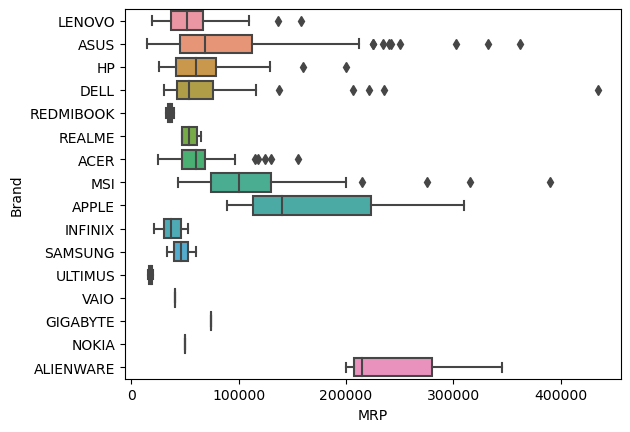

<Figure size 1000x3000 with 0 Axes>

In [80]:
sns.boxplot(x='MRP',y= 'Brand', data= df)
plt.figure(figsize=(10,30))
plt.show()

In [81]:
mean_prices=df.groupby('Brand')['MRP'].mean()
mean_sorting= mean_prices.sort_values(ascending= False)
print(mean_sorting)

Brand
ALIENWARE    253390.000000
APPLE        162332.105263
MSI          123411.344828
ASUS          91455.632353
DELL          74613.232143
GIGABYTE      73990.000000
HP            65943.157895
ACER          65000.764706
REALME        54742.250000
LENOVO        54473.032258
NOKIA         50490.000000
SAMSUNG       46490.000000
VAIO          40990.000000
INFINIX       37347.142857
REDMIBOOK     35990.000000
ULTIMUS       17990.000000
Name: MRP, dtype: float64


In [82]:
median_prices=df.groupby('Brand')['MRP'].median()
sorting= median_prices.sort_values(ascending= False)
print(sorting)

Brand
ALIENWARE    214790.0
APPLE        139990.0
MSI           99990.0
GIGABYTE      73990.0
ASUS          68740.0
HP            60390.0
ACER          60060.0
DELL          53657.0
REALME        53490.0
LENOVO        51490.0
NOKIA         50490.0
SAMSUNG       46490.0
VAIO          40990.0
INFINIX       37490.0
REDMIBOOK     35990.0
ULTIMUS       17990.0
Name: MRP, dtype: float64


In [83]:
df['Brand'].value_counts()

ASUS         136
LENOVO        62
HP            57
DELL          56
ACER          34
MSI           29
APPLE         19
INFINIX       14
REALME         4
ALIENWARE      3
REDMIBOOK      2
SAMSUNG        2
ULTIMUS        2
VAIO           1
GIGABYTE       1
NOKIA          1
Name: Brand, dtype: int64

ASUS laptops have the highest demands and they have a wide range of laptop prices, from the cheap to very expensive prices, however the median falls around the cheaper prices which indicates that the cheaper ASUS Laptops are mostly bought.Lenovo have the next highest demand and their median prices are low, however, they have some laptops that are comparatively expensive, hence the presence of outliers. Alienware has the highest average of all,they are averagely the most expensive brands bought, but only few of their laptops are bought.Apple laptops also have a wide range of prices,and their cheaper products are also favoured. HP and DELL have same demand and similar median value, this could mean that the products have similar features.

The highest mean price is for Alienware laptops, followed by Apple, Asus, and MSI. This suggests that these brands tend to produce high-end laptops that command a premium price. The lowest mean prices are for Ultimus, Infinix, and Nokia laptops. This suggests that these brands tend to produce lower-end or budget laptops. The price ranges for some brand vary widely. For example, Asus laptops have a price range of 14,990 to 361,990. This suggests that this brand has a wide variety of laptop models with different features and price points. Some brands, such as Vaio and Nokia, have only one laptop model listed in the dataset, which could mean that they are of a lower demand.



In [84]:
mask = df['Processor'].str.contains('Intel Core i3')
df.loc[mask, 'Processor'] = 'Intel Core i3 Processor'

In [85]:
mask = df['Processor'].str.contains('Intel Evo Core i5 ProcessorIntel Core i5 Processor')
df.loc[mask, 'Processor'] = 'Intel Core i5 Processor'

In [87]:
df['Processor']= df['Processor'].apply(lambda x:x.replace('AMD', '').replace('Apple', ''))

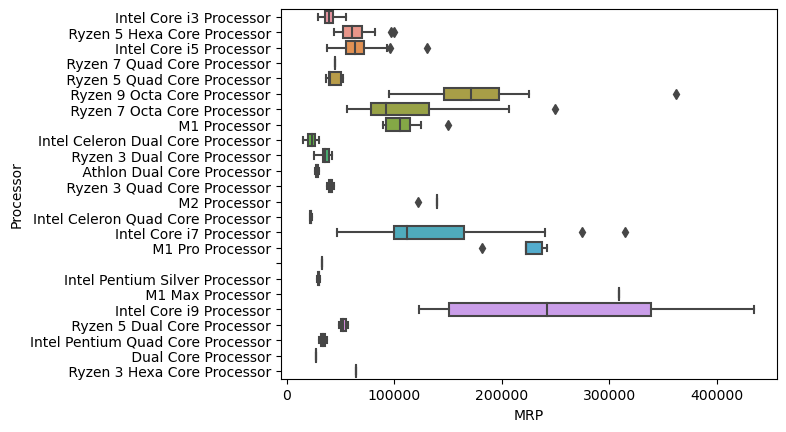

<Figure size 1000x3000 with 0 Axes>

In [88]:
sns.boxplot(x='MRP',y= 'Processor', data= df)
plt.figure(figsize=(10,30))
plt.show()

In [89]:
df['Processor'].value_counts()

Intel Core i5 Processor              111
Intel Core i3 Processor               73
Intel Core i7 Processor               53
 Ryzen 5 Hexa Core Processor          41
 Ryzen 7 Octa Core Processor          38
Intel Celeron Dual Core Processor     18
 Ryzen 3 Dual Core Processor          17
 Ryzen 9 Octa Core Processor          16
Intel Core i9 Processor               11
 Ryzen 5 Quad Core Processor           8
 M1 Processor                          7
 M1 Pro Processor                      6
 M2 Processor                          5
 Ryzen 3 Quad Core Processor           3
Intel Pentium Silver Processor         3
Intel Celeron Quad Core Processor      2
 Athlon Dual Core Processor            2
 Ryzen 5 Dual Core Processor           2
Intel Pentium Quad Core Processor      2
                                       1
 M1 Max Processor                      1
 Ryzen 7 Quad Core Processor           1
 Dual Core Processor                   1
 Ryzen 3 Hexa Core Processor           1
Name: Processor,

In [90]:
df['Processor'] = df['Processor'].str.strip()

In [91]:
median_prices=df.groupby('Processor')['MRP'].median()
sorting= median_prices.sort_values(ascending= False)
print(sorting)

Processor
M1 Max Processor                     309490.0
Intel Core i9 Processor              241990.0
M1 Pro Processor                     222990.0
Ryzen 9 Octa Core Processor          171490.0
M2 Processor                         139990.0
Intel Core i7 Processor              111990.0
M1 Processor                         104990.0
Ryzen 7 Octa Core Processor           92495.0
Ryzen 3 Hexa Core Processor           64590.0
Intel Core i5 Processor               62990.0
Ryzen 5 Hexa Core Processor           60990.0
Ryzen 5 Dual Core Processor           52587.0
Ryzen 7 Quad Core Processor           44990.0
Ryzen 3 Quad Core Processor           40799.0
Ryzen 5 Quad Core Processor           40490.0
Intel Core i3 Processor               38990.0
Ryzen 3 Dual Core Processor           34990.0
Intel Pentium Quad Core Processor     33490.0
                                      32990.0
Intel Pentium Silver Processor        29490.0
Athlon Dual Core Processor            27690.0
Dual Core Processor     

The boxplot analysis indicates that the type of processor in a laptop has a significant impact on its price. Most Ryzen laptops have low prices, with the exception of those with an Octa Core Processor.

M1 Max processors are generally the most expensive, although their high price could be attributed to the laptop's more sophisticated and rare features, making it less widely available. Meanwhile, Intel Core i9 processors have the widest range of expensive prices, but only a count of 10, indicating that their higher prices may be responsible for fewer purchases.

Intel Core i7 processors also have a wide price range and a frequency count of 49, indicating moderate demand. Cheaper Intel Core i7 laptops are in higher demand than the more expensive ones. Ryzen 9 Octa Core processors also have a spread in their prices and a frequency count of 87, which is relatively high. The more expensive laptops with this processor are purchased more frequently than the higher-priced ones.

In contrast, the Intel Core i5 and Intel Core i3 processors are the most in-demand, with a narrow and stable price range. This suggests that they are popular and more affordable. Similarly, the Ryzen 3 Hexa Core processor also has a narrow margin, but it is fairly in demand and affordable.

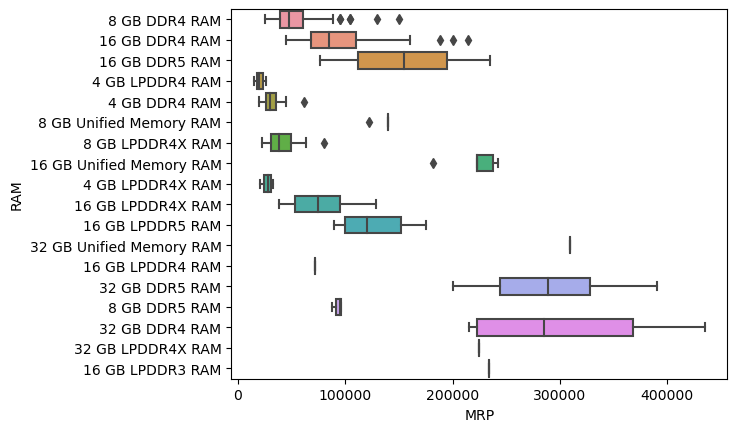

<Figure size 1000x3000 with 0 Axes>

In [94]:
sns.boxplot(x='MRP',y= 'RAM', data= df)
plt.figure(figsize=(10,30))
plt.show()

In [93]:
df['RAM']= df['RAM'].apply(lambda x:x.replace('128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM', '8 GB DDR4 RAM'))

In [95]:
df['RAM'].value_counts()

8 GB DDR4 RAM               205
16 GB DDR4 RAM               90
16 GB DDR5 RAM               29
4 GB DDR4 RAM                22
8 GB LPDDR4X RAM             13
16 GB LPDDR4X RAM            13
32 GB DDR5 RAM               10
16 GB LPDDR5 RAM              9
4 GB LPDDR4 RAM               7
16 GB Unified Memory RAM      6
8 GB Unified Memory RAM       5
32 GB DDR4 RAM                4
4 GB LPDDR4X RAM              3
8 GB DDR5 RAM                 3
32 GB Unified Memory RAM      1
16 GB LPDDR4 RAM              1
32 GB LPDDR4X RAM             1
16 GB LPDDR3 RAM              1
Name: RAM, dtype: int64

In [96]:
df.groupby(['RAM']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                         
                               min       max           mean
RAM                                                        
16 GB DDR4 RAM             44990.0  214790.0   93249.288889
16 GB DDR5 RAM             76590.0  235283.0  155513.379310
16 GB LPDDR3 RAM          233990.0  233990.0  233990.000000
16 GB LPDDR4 RAM           71990.0   71990.0   71990.000000
16 GB LPDDR4X RAM          37990.0  128990.0   75067.615385
16 GB LPDDR5 RAM           89990.0  174990.0  125878.888889
16 GB Unified Memory RAM  181990.0  241990.0  222490.000000
32 GB DDR4 RAM            214990.0  434830.0  305050.000000
32 GB DDR5 RAM            199990.0  389990.0  290790.000000
32 GB LPDDR4X RAM         224990.0  224990.0  224990.000000
32 GB Unified Memory RAM  309490.0  309490.0  309490.000000
4 GB DDR4 RAM              19490.0   61249.0   31867.181818
4 GB LPDDR4 RAM            14990.0   25990.0   20618.571429
4 GB LPDDR4X RAM           20990.0   32990.0   27490.000000
8 GB DDR4 RAM              24990.0  149990.0   52323.360976
8 GB DDR5 RAM              87900.0   96579.0   93156.333333
8 GB LPDDR4X RAM           22990.0   79990.0   43374.615385
8 GB Unified Memory RAM   121990.0  139990.0  136390.000000

The RAM size varies from 4 GB to 32 GB. DDR4 is the most common RAM type among the options provided. DDR5 RAM is more expensive than DDR4 RAM, with a higher maximum and mean price for the 16 GB options. LPDDR3 and LPDDR4 RAM types are available only in 16 GB size, with LPDDR3 being the most expensive RAM type between the two. LPDDR4X and LPDDR5 RAM types are available in both 16 GB and 8 GB sizes. LPDDR5 is the most expensive RAM type in the 16 GB category, while LPDDR4X is the most expensive in the 8 GB category. Unified Memory RAM is available only in 8 GB and 32 GB sizes, with a maximum price of 309,490.0 for the 32 GB option. In general, as the RAM size increases, so does the price, with some exceptions due to the different RAM types and technologies used.

In [97]:
df.head()

,Product,Rating,MRP,Feature,Processor,Display,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,35.56,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,LENOVO
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,LENOVO
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,Ryzen 5 Hexa Core Processor,39.62,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,39.62,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS


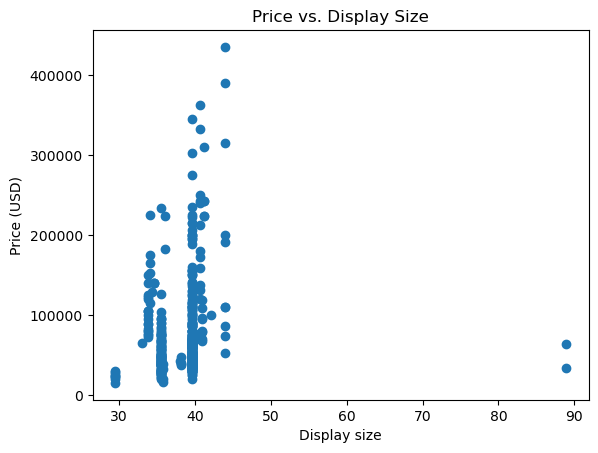

In [98]:
plt.scatter(df['Display'], df['MRP'])

# Add labels and title
plt.xlabel('Display size')
plt.ylabel('Price (USD)')
plt.title('Price vs. Display Size')

# Show the plot
plt.show()

In [99]:
df['Display'].value_counts()

39.62    240
35.56     95
33.78     18
40.64     15
43.94     10
40.89      8
29.46      8
34.04      5
41.15      5
35.81      4
38.10      4
34.54      3
88.90      2
36.07      2
33.02      1
38.00      1
34.29      1
42.16      1
Name: Display, dtype: int64

In [100]:
#removing outliers
display_df=df[df['Display']<60]

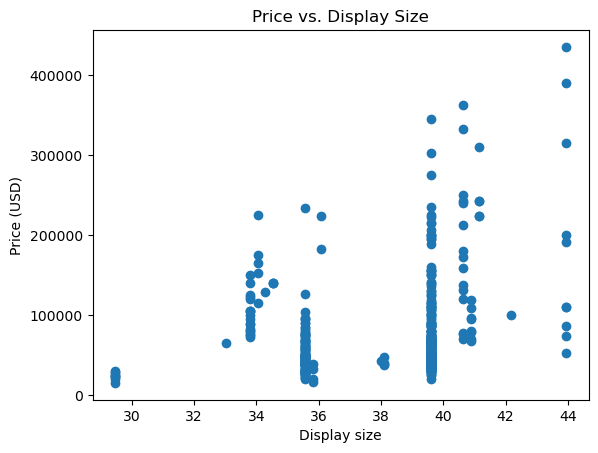

In [101]:
plt.scatter(display_df['Display'], display_df['MRP'])

# Add labels and title
plt.xlabel('Display size')
plt.ylabel('Price (USD)')
plt.title('Price vs. Display Size')

# Show the plot
plt.show()

Based on the analysis, even after removing outliers, there appears to be a weak correlation between the display size and the price of laptops. However, it is observed that laptops with a display size less than 40 cm are not priced above 30,000, those with a display size of around 40 to 42 cm are priced below 40,000, and those around 44 cm have some priced above 40,000.

Nevertheless, it is crucial to note that the prices vary considerably for each display size, likely due to the presence of other pertinent features that the laptop possesses.

In [102]:
df['OS']= df['OS'].apply(lambda x:x.replace('Windows 10 Operating SystemWindows 10 Operating System', 'Windows 10 Operating System'))

In [103]:
df['OS'].value_counts()

Windows 11 Operating System    278
Windows 10 Operating System    116
Mac OS Operating System         19
Chrome Operating System          6
DOS Operating System             4
Name: OS, dtype: int64

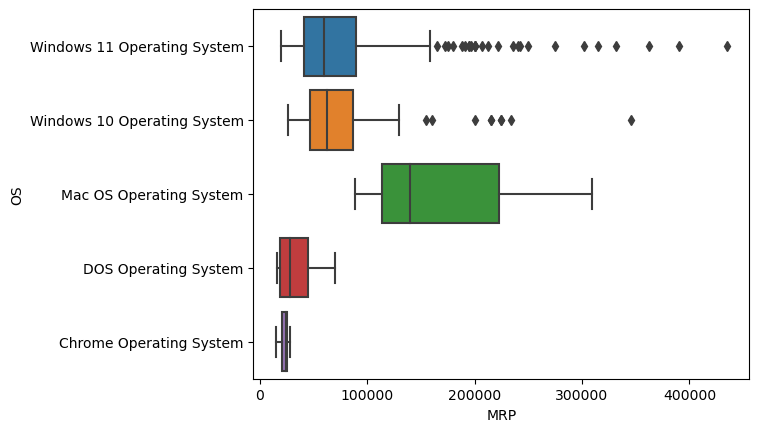

<Figure size 1000x3000 with 0 Axes>

In [104]:
sns.boxplot(x='MRP',y= 'OS', data= df)
plt.figure(figsize=(10,30))
plt.show()

In [105]:
df.groupby(['OS']).agg({'MRP' : ['min', 'max', 'mean','median','count']})

MRP                                         
                                 min       max           mean    median count
OS                                                                           
Chrome Operating System      14990.0   28490.0   22806.666667   23940.0     6
DOS Operating System         15990.0   69990.0   35365.000000   27740.0     4
Mac OS Operating System      88990.0  309490.0  162332.105263  139990.0    19
Windows 10 Operating System  25950.0  345390.0   77224.741379   62590.0   116
Windows 11 Operating System  19990.0  434830.0   79760.392086   59990.0   278

According to the data analysis, the Mac OS Operating System has the highest mean price, followed by Windows 11 and then Windows 10. The maximum price, on the other hand, is highest for Windows 11, followed by Windows 10 and then Mac OS. Meanwhile, the lowest minimum price is for Windows 11, followed by Windows 10, and the highest is for Mac OS.

In terms of median price, the Mac OS Operating System has the highest value, followed by Windows 10 and then Windows 11. The count of data points is highest for Windows 11, followed by Windows 10.

The wider price range and greater number of outliers for Windows 11 may be due to the presence of distinct features in some products, resulting in varied pricing.

Overall, the prices for the Mac OS Operating System are relatively higher than those of Windows 10 and Windows 11. Windows 11 is generally priced higher than Windows 10.

It is worth noting that while Mac laptops are generally more expensive, Windows 11 and 10 are generally more affordable. However, there are some products for Windows 11 and 10 that are priced higher than Apple's offerings, likely due to certain features and other factors.



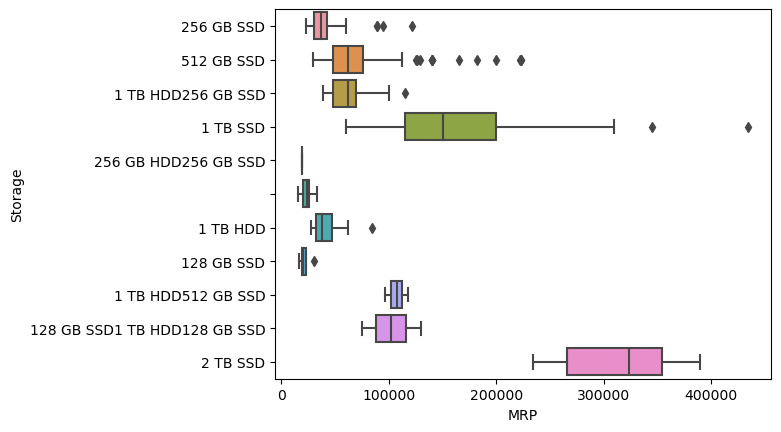

<Figure size 1000x3000 with 0 Axes>

In [106]:
sns.boxplot(x='MRP',y= 'Storage', data= df)
plt.figure(figsize=(10,30))
plt.show()

In [107]:
df['Storage'].value_counts()

512 GB SSD                      223
1 TB SSD                         74
256 GB SSD                       63
1 TB HDD256 GB SSD               25
1 TB HDD                         14
                                  9
2 TB SSD                          6
128 GB SSD                        4
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64

In [108]:
df.groupby(['Storage']).agg({'MRP' : ['min', 'max', 'mean','median','count']})

MRP                                     \
                                   min       max           mean    median   
Storage                                                                     
                               14990.0   32990.0   23534.444444   23490.0   
1 TB HDD                       27490.0   83990.0   42684.714286   37490.0   
1 TB HDD256 GB SSD             38990.0  114990.0   61928.480000   61490.0   
1 TB HDD512 GB SSD             96490.0  117990.0  107240.000000  107240.0   
1 TB SSD                       59990.0  434830.0  162308.972973  149990.0   
128 GB SSD                     15990.0   29980.0   21737.500000   20490.0   
128 GB SSD1 TB HDD128 GB SSD   74590.0  129999.0  102294.500000  102294.5   
2 TB SSD                      233990.0  389990.0  313823.333333  323490.0   
256 GB HDD256 GB SSD           19490.0   19490.0   19490.000000   19490.0   
256 GB SSD                     22990.0  121990.0   39935.809524   36990.0   
512 GB SSD                     29390.0  222990.0   68166.780269   61986.0   

                                    
                             count  
Storage                             
                                 9  
1 TB HDD                        14  
1 TB HDD256 GB SSD              25  
1 TB HDD512 GB SSD               2  
1 TB SSD                        74  
128 GB SSD                       4  
128 GB SSD1 TB HDD128 GB SSD     2  
2 TB SSD                         6  
256 GB HDD256 GB SSD             1  
256 GB SSD                      63  
512 GB SSD                     223

The available storage options include Solid State Drives (SSD), Hard Disk Drives (HDD), and a combination of both SSD and HDD. The SSD options range from 128GB, 256GB, 512GB, 1TB, to 2TB, while the only available HDD option is 1TB. The hybrid storage solutions combine 256GB HDD with 256GB SSD or 1TB HDD with 128GB, 256GB, or 512GB SSD.

Notably, laptops with SSD storage are generally more expensive than those with HDD storage, with hybrid options falling in between. The cost of the laptops reduces as the size of the SSD decreases, with the SSD laptops being the most expensive, followed by the hybrid laptops with 1TB HDD, and finally the only HDD laptop with 1TB storage.



In [109]:
df['Processor'].value_counts()

Intel Core i5 Processor              111
Intel Core i3 Processor               73
Intel Core i7 Processor               53
Ryzen 5 Hexa Core Processor           41
Ryzen 7 Octa Core Processor           38
Intel Celeron Dual Core Processor     18
Ryzen 3 Dual Core Processor           17
Ryzen 9 Octa Core Processor           16
Intel Core i9 Processor               11
Ryzen 5 Quad Core Processor            8
M1 Processor                           7
M1 Pro Processor                       6
M2 Processor                           5
Ryzen 3 Quad Core Processor            3
Intel Pentium Silver Processor         3
Intel Celeron Quad Core Processor      2
Athlon Dual Core Processor             2
Ryzen 5 Dual Core Processor            2
Intel Pentium Quad Core Processor      2
                                       1
M1 Max Processor                       1
Ryzen 7 Quad Core Processor            1
Dual Core Processor                    1
Ryzen 3 Hexa Core Processor            1
Name: Processor,

In [110]:
df['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

In [111]:
df[['RAMSize','GB','RAMType']] = df['RAM'].str.split(n=2, expand=True)

In [112]:
df[['RAMSize','GB','RAMType']] = df['RAM'].str.split(n=2, expand=True)

In [113]:
df=df.drop('GB',axis=1)

In [114]:
df['OS'] = df['OS'].str.split().str[0]

In [115]:
df.head()

,Product,Rating,MRP,Feature,Processor,Display,RAM,OS,Storage,Brand,RAMSize,RAMType
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,35.56,8 GB DDR4 RAM,Windows,256 GB SSD,LENOVO,8,DDR4 RAM
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62,8 GB DDR4 RAM,Windows,512 GB SSD,LENOVO,8,DDR4 RAM
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62,8 GB DDR4 RAM,Windows,512 GB SSD,ASUS,8,DDR4 RAM
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,Ryzen 5 Hexa Core Processor,39.62,8 GB DDR4 RAM,Windows,512 GB SSD,HP,8,DDR4 RAM
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,39.62,8 GB DDR4 RAM,Windows,512 GB SSD,ASUS,8,DDR4 RAM


In [117]:
df['Processor'].value_counts()

Intel Core i5 Processor              111
Intel Core i3 Processor               73
Intel Core i7 Processor               53
Ryzen 5 Hexa Core Processor           41
Ryzen 7 Octa Core Processor           38
Intel Celeron Dual Core Processor     18
Ryzen 3 Dual Core Processor           17
Ryzen 9 Octa Core Processor           16
Intel Core i9 Processor               11
Ryzen 5 Quad Core Processor            8
M1 Processor                           7
M1 Pro Processor                       6
M2 Processor                           5
Ryzen 3 Quad Core Processor            3
Intel Pentium Silver Processor         3
Intel Celeron Quad Core Processor      2
Athlon Dual Core Processor             2
Ryzen 5 Dual Core Processor            2
Intel Pentium Quad Core Processor      2
                                       1
M1 Max Processor                       1
Ryzen 7 Quad Core Processor            1
Dual Core Processor                    1
Ryzen 3 Hexa Core Processor            1
Name: Processor,

In [118]:
df['Storage']= df['Storage'].apply(lambda x:x.replace('1 TB HDD512 GB SSD', '1 TB HDD|512 GB SSD').replace('1 TB HDD256 GB SSD',' 1 TB HDD|256 GB SSD').replace('128 GB SSD1 TB HDD128 GB SSD','1 TB HDD|128 GB SSD').replace('256 GB HDD256 GB SSD','256 GB HDD|256 GB SSD'))

In [119]:
 df['Storage'].str.strip(' ')

0               256 GB SSD
1               512 GB SSD
2               512 GB SSD
3               512 GB SSD
4               512 GB SSD
              ...         
418             512 GB SSD
419             512 GB SSD
420                       
421             512 GB SSD
422    1 TB HDD|256 GB SSD
Name: Storage, Length: 423, dtype: object

In [120]:
df['Storage'].value_counts()

512 GB SSD               223
1 TB SSD                  74
256 GB SSD                63
 1 TB HDD|256 GB SSD      25
1 TB HDD                  14
                           9
2 TB SSD                   6
128 GB SSD                 4
1 TB HDD|512 GB SSD        2
1 TB HDD|128 GB SSD        2
256 GB HDD|256 GB SSD      1
Name: Storage, dtype: int64

In [121]:
df.head()

,Product,Rating,MRP,Feature,Processor,Display,RAM,OS,Storage,Brand,RAMSize,RAMType
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,35.56,8 GB DDR4 RAM,Windows,256 GB SSD,LENOVO,8,DDR4 RAM
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62,8 GB DDR4 RAM,Windows,512 GB SSD,LENOVO,8,DDR4 RAM
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62,8 GB DDR4 RAM,Windows,512 GB SSD,ASUS,8,DDR4 RAM
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,Ryzen 5 Hexa Core Processor,39.62,8 GB DDR4 RAM,Windows,512 GB SSD,HP,8,DDR4 RAM
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,39.62,8 GB DDR4 RAM,Windows,512 GB SSD,ASUS,8,DDR4 RAM


In [122]:
new_df=df[['Rating','MRP','Processor','Display','OS','Storage','Brand','RAMSize','RAMType']]

In [123]:
new_df.head(20)

,Rating,MRP,Processor,Display,OS,Storage,Brand,RAMSize,RAMType
0,4.2,36990.0,Intel Core i3 Processor,35.56,Windows,256 GB SSD,LENOVO,8,DDR4 RAM
1,4.2,39990.0,Intel Core i3 Processor,39.62,Windows,512 GB SSD,LENOVO,8,DDR4 RAM
2,4.3,32990.0,Intel Core i3 Processor,39.62,Windows,512 GB SSD,ASUS,8,DDR4 RAM
3,4.4,49990.0,Ryzen 5 Hexa Core Processor,39.62,Windows,512 GB SSD,HP,8,DDR4 RAM
4,4.4,49990.0,Intel Core i5 Processor,39.62,Windows,512 GB SSD,ASUS,8,DDR4 RAM
5,4.2,36990.0,Intel Core i3 Processor,35.56,Windows,256 GB SSD,HP,8,DDR4 RAM
6,4.3,38990.0,Intel Core i3 Processor,39.62,Windows,1 TB HDD|256 GB SSD,DELL,8,DDR4 RAM
7,4.1,39990.0,Intel Core i5 Processor,39.62,Windows,512 GB SSD,REDMIBOOK,8,DDR4 RAM
8,4.4,46990.0,Intel Core i3 Processor,35.56,Windows,256 GB SSD,REALME,8,DDR4 RAM
9,4.1,44990.0,Ryzen 7 Quad Core Processor,35.56,Windows,512 GB SSD,ASUS,16,DDR4 RAM


In [124]:
new_df[['Storage_HDD', 'Storage_SSD']] = new_df['Storage'].str.split('|', expand=True)

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/2203668376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['Storage_HDD', 'Storage_SSD']] = new_df['Storage'].str.split('|', expand=True)
/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/2203668376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['Storage_HDD', 'Storage_SSD']] = new_df['Storage'].str.split('|', expand=True)


In [128]:
mask = new_df['Storage_HDD'].str.contains('SSD')
new_df.loc[mask, ['Storage_HDD', 'Storage_SSD']] = new_df.loc[mask, ['Storage_SSD', 'Storage_HDD']].values

In [127]:
new_df['Storage_HDD'] = new_df['Storage_HDD'].fillna('0 HDD')

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/101854821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Storage_HDD'] = new_df['Storage_HDD'].fillna('0 HDD')


In [129]:
new_df['RAMType']= new_df['RAMType'].apply(lambda x:x.replace('RAM', ''))

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/3701083332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['RAMType']= new_df['RAMType'].apply(lambda x:x.replace('RAM', ''))


In [130]:
new_df.head(20)

,Rating,MRP,Processor,Display,OS,Storage,Brand,RAMSize,RAMType,Storage_HDD,Storage_SSD
0,4.2,36990.0,Intel Core i3 Processor,35.56,Windows,256 GB SSD,LENOVO,8,DDR4,0 HDD,256 GB SSD
1,4.2,39990.0,Intel Core i3 Processor,39.62,Windows,512 GB SSD,LENOVO,8,DDR4,0 HDD,512 GB SSD
2,4.3,32990.0,Intel Core i3 Processor,39.62,Windows,512 GB SSD,ASUS,8,DDR4,0 HDD,512 GB SSD
3,4.4,49990.0,Ryzen 5 Hexa Core Processor,39.62,Windows,512 GB SSD,HP,8,DDR4,0 HDD,512 GB SSD
4,4.4,49990.0,Intel Core i5 Processor,39.62,Windows,512 GB SSD,ASUS,8,DDR4,0 HDD,512 GB SSD
5,4.2,36990.0,Intel Core i3 Processor,35.56,Windows,256 GB SSD,HP,8,DDR4,0 HDD,256 GB SSD
6,4.3,38990.0,Intel Core i3 Processor,39.62,Windows,1 TB HDD|256 GB SSD,DELL,8,DDR4,1 TB HDD,256 GB SSD
7,4.1,39990.0,Intel Core i5 Processor,39.62,Windows,512 GB SSD,REDMIBOOK,8,DDR4,0 HDD,512 GB SSD
8,4.4,46990.0,Intel Core i3 Processor,35.56,Windows,256 GB SSD,REALME,8,DDR4,0 HDD,256 GB SSD
9,4.1,44990.0,Ryzen 7 Quad Core Processor,35.56,Windows,512 GB SSD,ASUS,16,DDR4,0 HDD,512 GB SSD


In [131]:
new_df1=new_df[['Rating','MRP','Processor','Display','OS','Brand','RAMSize','RAMType','Storage_HDD','Storage_SSD']]

In [132]:
new_df1.head(30)

,Rating,MRP,Processor,Display,OS,Brand,RAMSize,RAMType,Storage_HDD,Storage_SSD
0,4.2,36990.0,Intel Core i3 Processor,35.56,Windows,LENOVO,8,DDR4,0 HDD,256 GB SSD
1,4.2,39990.0,Intel Core i3 Processor,39.62,Windows,LENOVO,8,DDR4,0 HDD,512 GB SSD
2,4.3,32990.0,Intel Core i3 Processor,39.62,Windows,ASUS,8,DDR4,0 HDD,512 GB SSD
3,4.4,49990.0,Ryzen 5 Hexa Core Processor,39.62,Windows,HP,8,DDR4,0 HDD,512 GB SSD
4,4.4,49990.0,Intel Core i5 Processor,39.62,Windows,ASUS,8,DDR4,0 HDD,512 GB SSD
5,4.2,36990.0,Intel Core i3 Processor,35.56,Windows,HP,8,DDR4,0 HDD,256 GB SSD
6,4.3,38990.0,Intel Core i3 Processor,39.62,Windows,DELL,8,DDR4,1 TB HDD,256 GB SSD
7,4.1,39990.0,Intel Core i5 Processor,39.62,Windows,REDMIBOOK,8,DDR4,0 HDD,512 GB SSD
8,4.4,46990.0,Intel Core i3 Processor,35.56,Windows,REALME,8,DDR4,0 HDD,256 GB SSD
9,4.1,44990.0,Ryzen 7 Quad Core Processor,35.56,Windows,ASUS,16,DDR4,0 HDD,512 GB SSD


In [133]:
new_df1['Storage_HDD']= new_df1['Storage_HDD'].apply(lambda x:x.replace('GB', ''))

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/3500766889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Storage_HDD']= new_df1['Storage_HDD'].apply(lambda x:x.replace('GB', ''))


In [134]:
new_df1['Storage_SSD'].value_counts()

512 GB SSD    225
256 GB SSD     89
1 TB SSD       74
128 GB SSD      6
2 TB SSD        6
Name: Storage_SSD, dtype: int64

In [135]:
new_df1.dropna(inplace=True)

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/1222235657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1.dropna(inplace=True)


In [136]:
new_df1.isnull().sum()

Rating         0
MRP            0
Processor      0
Display        0
OS             0
Brand          0
RAMSize        0
RAMType        0
Storage_HDD    0
Storage_SSD    0
dtype: int64

In [137]:
new_df1['Storage_SSD'] = new_df1['Storage_SSD'].apply(lambda x: x.replace('SSD', ''))

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/3894448593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Storage_SSD'] = new_df1['Storage_SSD'].apply(lambda x: x.replace('SSD', ''))


In [138]:
new_df1['Storage_SSD'] = new_df1['Storage_SSD'].apply(lambda x: x.replace('1 TB', '1000').replace('2 TB','2000'))

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/2035968207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Storage_SSD'] = new_df1['Storage_SSD'].apply(lambda x: x.replace('1 TB', '1000').replace('2 TB','2000'))


In [139]:
new_df1['Storage_SSD'] = new_df1['Storage_SSD'].apply(lambda x: x.replace('GB', ''))

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/2483882022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Storage_SSD'] = new_df1['Storage_SSD'].apply(lambda x: x.replace('GB', ''))


In [140]:
new_df1.head(20)

,Rating,MRP,Processor,Display,OS,Brand,RAMSize,RAMType,Storage_HDD,Storage_SSD
0,4.2,36990.0,Intel Core i3 Processor,35.56,Windows,LENOVO,8,DDR4,0 HDD,256
1,4.2,39990.0,Intel Core i3 Processor,39.62,Windows,LENOVO,8,DDR4,0 HDD,512
2,4.3,32990.0,Intel Core i3 Processor,39.62,Windows,ASUS,8,DDR4,0 HDD,512
3,4.4,49990.0,Ryzen 5 Hexa Core Processor,39.62,Windows,HP,8,DDR4,0 HDD,512
4,4.4,49990.0,Intel Core i5 Processor,39.62,Windows,ASUS,8,DDR4,0 HDD,512
5,4.2,36990.0,Intel Core i3 Processor,35.56,Windows,HP,8,DDR4,0 HDD,256
6,4.3,38990.0,Intel Core i3 Processor,39.62,Windows,DELL,8,DDR4,1 TB HDD,256
7,4.1,39990.0,Intel Core i5 Processor,39.62,Windows,REDMIBOOK,8,DDR4,0 HDD,512
8,4.4,46990.0,Intel Core i3 Processor,35.56,Windows,REALME,8,DDR4,0 HDD,256
9,4.1,44990.0,Ryzen 7 Quad Core Processor,35.56,Windows,ASUS,16,DDR4,0 HDD,512


In [141]:
new_df1['Storage_SSD'] = new_df1['Storage_SSD'].str.strip()

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/3217019861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Storage_SSD'] = new_df1['Storage_SSD'].str.strip()


In [142]:
new_df1['Storage_HDD'] = new_df1['Storage_HDD'].str.strip()

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/2008941795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Storage_HDD'] = new_df1['Storage_HDD'].str.strip()


In [143]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 422
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       400 non-null    float64
 1   MRP          400 non-null    float64
 2   Processor    400 non-null    object 
 3   Display      400 non-null    float64
 4   OS           400 non-null    object 
 5   Brand        400 non-null    object 
 6   RAMSize      400 non-null    object 
 7   RAMType      400 non-null    object 
 8   Storage_HDD  400 non-null    object 
 9   Storage_SSD  400 non-null    object 
dtypes: float64(3), object(7)
memory usage: 34.4+ KB


In [148]:
new_df1.head(20)

,Rating,MRP,Processor,Display,OS,Brand,RAMSize,RAMType,Storage_HDD,Storage_SSD
0,4.2,36990.0,Intel Core i3 Processor,35.56,Windows,LENOVO,8,DDR4,0 HDD,256
1,4.2,39990.0,Intel Core i3 Processor,39.62,Windows,LENOVO,8,DDR4,0 HDD,512
2,4.3,32990.0,Intel Core i3 Processor,39.62,Windows,ASUS,8,DDR4,0 HDD,512
3,4.4,49990.0,Ryzen 5 Hexa Core Processor,39.62,Windows,HP,8,DDR4,0 HDD,512
4,4.4,49990.0,Intel Core i5 Processor,39.62,Windows,ASUS,8,DDR4,0 HDD,512
5,4.2,36990.0,Intel Core i3 Processor,35.56,Windows,HP,8,DDR4,0 HDD,256
6,4.3,38990.0,Intel Core i3 Processor,39.62,Windows,DELL,8,DDR4,1 TB HDD,256
7,4.1,39990.0,Intel Core i5 Processor,39.62,Windows,REDMIBOOK,8,DDR4,0 HDD,512
8,4.4,46990.0,Intel Core i3 Processor,35.56,Windows,REALME,8,DDR4,0 HDD,256
9,4.1,44990.0,Ryzen 7 Quad Core Processor,35.56,Windows,ASUS,16,DDR4,0 HDD,512


In [149]:
new_df1['Storage_HDD'] = new_df1['Storage_HDD'].apply(lambda x: x.replace('1 TB', '1000').replace('2 TB','2000'))

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/1167073415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Storage_HDD'] = new_df1['Storage_HDD'].apply(lambda x: x.replace('1 TB', '1000').replace('2 TB','2000'))


In [150]:
new_df1['Storage_HDD'] = new_df1['Storage_HDD'].apply(lambda x: x.replace('HDD', ''))

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/385854514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Storage_HDD'] = new_df1['Storage_HDD'].apply(lambda x: x.replace('HDD', ''))


In [151]:
new_df1[['RAMSize', 'Storage_HDD','Storage_SSD']] = new_df1[['RAMSize', 'Storage_HDD','Storage_SSD']].astype(int)

/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/2516479016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1[['RAMSize', 'Storage_HDD','Storage_SSD']] = new_df1[['RAMSize', 'Storage_HDD','Storage_SSD']].astype(int)


In [152]:
new_df1.head(20)

,Rating,MRP,Processor,Display,OS,Brand,RAMSize,RAMType,Storage_HDD,Storage_SSD
0,4.2,36990.0,Intel Core i3 Processor,35.56,Windows,LENOVO,8,DDR4,0,256
1,4.2,39990.0,Intel Core i3 Processor,39.62,Windows,LENOVO,8,DDR4,0,512
2,4.3,32990.0,Intel Core i3 Processor,39.62,Windows,ASUS,8,DDR4,0,512
3,4.4,49990.0,Ryzen 5 Hexa Core Processor,39.62,Windows,HP,8,DDR4,0,512
4,4.4,49990.0,Intel Core i5 Processor,39.62,Windows,ASUS,8,DDR4,0,512
5,4.2,36990.0,Intel Core i3 Processor,35.56,Windows,HP,8,DDR4,0,256
6,4.3,38990.0,Intel Core i3 Processor,39.62,Windows,DELL,8,DDR4,1000,256
7,4.1,39990.0,Intel Core i5 Processor,39.62,Windows,REDMIBOOK,8,DDR4,0,512
8,4.4,46990.0,Intel Core i3 Processor,35.56,Windows,REALME,8,DDR4,0,256
9,4.1,44990.0,Ryzen 7 Quad Core Processor,35.56,Windows,ASUS,16,DDR4,0,512


In [153]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 422
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       400 non-null    float64
 1   MRP          400 non-null    float64
 2   Processor    400 non-null    object 
 3   Display      400 non-null    float64
 4   OS           400 non-null    object 
 5   Brand        400 non-null    object 
 6   RAMSize      400 non-null    int64  
 7   RAMType      400 non-null    object 
 8   Storage_HDD  400 non-null    int64  
 9   Storage_SSD  400 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 34.4+ KB


## Model Building

In [154]:
new_df2=new_df1[['MRP','Processor','OS','Brand','RAMSize','RAMType','Storage_HDD','Storage_SSD']]

In [156]:
new_df2.head(20)

,MRP,Processor,OS,Brand,RAMSize,RAMType,Storage_HDD,Storage_SSD
0,36990.0,Intel Core i3 Processor,Windows,LENOVO,8,DDR4,0,256
1,39990.0,Intel Core i3 Processor,Windows,LENOVO,8,DDR4,0,512
2,32990.0,Intel Core i3 Processor,Windows,ASUS,8,DDR4,0,512
3,49990.0,Ryzen 5 Hexa Core Processor,Windows,HP,8,DDR4,0,512
4,49990.0,Intel Core i5 Processor,Windows,ASUS,8,DDR4,0,512
5,36990.0,Intel Core i3 Processor,Windows,HP,8,DDR4,0,256
6,38990.0,Intel Core i3 Processor,Windows,DELL,8,DDR4,1000,256
7,39990.0,Intel Core i5 Processor,Windows,REDMIBOOK,8,DDR4,0,512
8,46990.0,Intel Core i3 Processor,Windows,REALME,8,DDR4,0,256
9,44990.0,Ryzen 7 Quad Core Processor,Windows,ASUS,16,DDR4,0,512


In [157]:
from sklearn.preprocessing import LabelEncoder

le_processor = LabelEncoder()
new_df2['Processor'] = le_processor.fit_transform(new_df2['Processor'])

le_os = LabelEncoder()
new_df2['OS'] = le_os.fit_transform(new_df2['OS'])

le_brand = LabelEncoder()
new_df2['Brand'] = le_brand.fit_transform(new_df2['Brand'])

le_ramtype = LabelEncoder()
new_df2['RAMType'] = le_ramtype.fit_transform(new_df2['RAMType'])


/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/3190917751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['Processor'] = le_processor.fit_transform(new_df2['Processor'])
/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/3190917751.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['OS'] = le_os.fit_transform(new_df2['OS'])
/var/folders/17/f7z1bkt16517dfnzz7sbsb240000gn/T/ipykernel_48541/3190917751.py:10: SettingWithCopyWarning: 
A value is trying to be s

In [158]:
new_df2.head(20)

,MRP,Processor,OS,Brand,RAMSize,RAMType,Storage_HDD,Storage_SSD
0,36990.0,3,2,8,8,0,0,256
1,39990.0,3,2,8,8,0,0,512
2,32990.0,3,2,3,8,0,0,512
3,49990.0,17,2,6,8,0,0,512
4,49990.0,4,2,3,8,0,0,512
5,36990.0,3,2,6,8,0,0,256
6,38990.0,3,2,4,8,0,1000,256
7,39990.0,4,2,12,8,0,0,512
8,46990.0,3,2,11,8,0,0,256
9,44990.0,20,2,3,16,0,0,512


In [159]:
new_df2.corr()

,MRP,Processor,OS,Brand,RAMSize,RAMType,Storage_HDD,Storage_SSD
MRP,1.000000,0.203299,-0.150468,-0.165020,0.797018,0.285850,-0.075061,0.762892
Processor,0.203299,1.000000,-0.026569,-0.144350,0.150839,-0.019109,-0.078694,0.277453
OS,-0.150468,-0.026569,1.000000,0.076025,0.067786,-0.358441,0.048941,0.049418
Brand,-0.165020,-0.144350,0.076025,1.000000,-0.084060,-0.045298,-0.113930,-0.091472
RAMSize,0.797018,0.150839,0.067786,-0.084060,1.000000,0.191251,-0.110971,0.679222
RAMType,0.285850,-0.019109,-0.358441,-0.045298,0.191251,1.000000,-0.123347,0.123470
Storage_HDD,-0.075061,-0.078694,0.048941,-0.113930,-0.110971,-0.123347,1.000000,-0.276796
Storage_SSD,0.762892,0.277453,0.049418,-0.091472,0.679222,0.123470,-0.276796,1.000000


In [160]:
X = new_df2.drop(['MRP'],axis=1)
y =new_df2['MRP'].values

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Linear Regression

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error


lm = LinearRegression()
scores = cross_val_score(lm, X_train, Y_train, cv=5, scoring='neg_mean_absolute_error')
mean_absolute_error_cv = -scores.mean()
print('Mean absolute error (CV):', mean_absolute_error_cv)

lm.fit(X_train, Y_train)
score = lm.score(X_test, Y_test)
y_linear = lm.predict(X_test)
mean_absolute_error_test = mean_absolute_error(y_linear, Y_test)
print('R-squared score:', score)
print('Mean absolute error (test):', mean_absolute_error_test)

Mean absolute error (CV): 19004.249071383674
R-squared score: 0.6992519242594036
Mean absolute error (test): 27199.068956131


### Random Forest

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, Y_train)

# Make predictions on test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print('Mean Absolute Error:', mae)
print('R^2:', r2)

Mean Absolute Error: 22218.143741749645
R^2: 0.7557064701807898


## Hyperparameter Tuning 

In [167]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


param_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(5, 25, 5),
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 5, 1),
}

rf = RandomForestRegressor()

random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_grid, 
    n_iter=50, 
    cv=5, 
    n_jobs=-1
)

random_search.fit(X_train, Y_train)

print(random_search.best_params_)


{'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


In [170]:
model = RandomForestRegressor(n_estimators=300, max_depth=10, max_features='log2', min_samples_split=4, min_samples_leaf=1, bootstrap=True)

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 19790.636030094036


In [171]:
r2 = r2_score(Y_test, y_pred)

print("R2 score:", r2)

R2 score: 0.7836442206731558


### Saving Datasets and Models

In [177]:
new_df1.to_csv('laptop.csv', index=False)

In [172]:
import pickle
with open('rfmodel.pkl', 'wb') as file:
    pickle.dump(model, file)

In [173]:
with open('encoder.pkl', 'wb') as f:
    pickle.dump(le_processor, f)


In [174]:
with open('encoder2.pkl', 'wb') as f:
    pickle.dump(le_os, f)

In [175]:
with open('encoder3.pkl', 'wb') as f:
    pickle.dump(le_brand, f)

In [176]:
with open('encoder.pkl4', 'wb') as f:
    pickle.dump(le_ramtype, f)